<a href="https://colab.research.google.com/github/sanju492/first_project/blob/main/Classification_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wine = pd.read_csv('/content/winequality-red.csv')

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 1.0, 'Wine Quality Distribution')

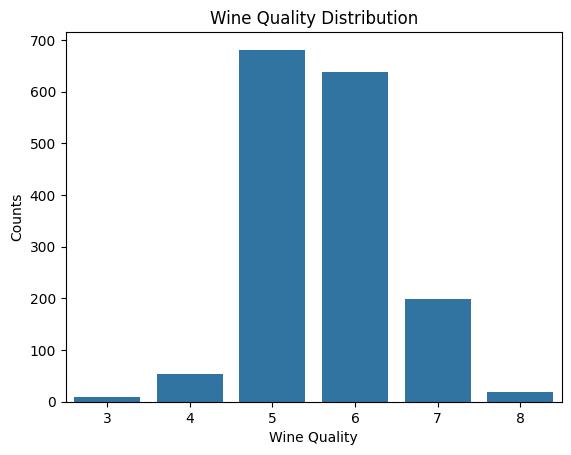

In [ ]:
quality_value_counts = wine['quality'].value_counts().sort_index()
sns.barplot(x=quality_value_counts.index, y=quality_value_counts)
plt.xlabel('Wine Quality')
plt.ylabel('Counts')
plt.title('Wine Quality Distribution')

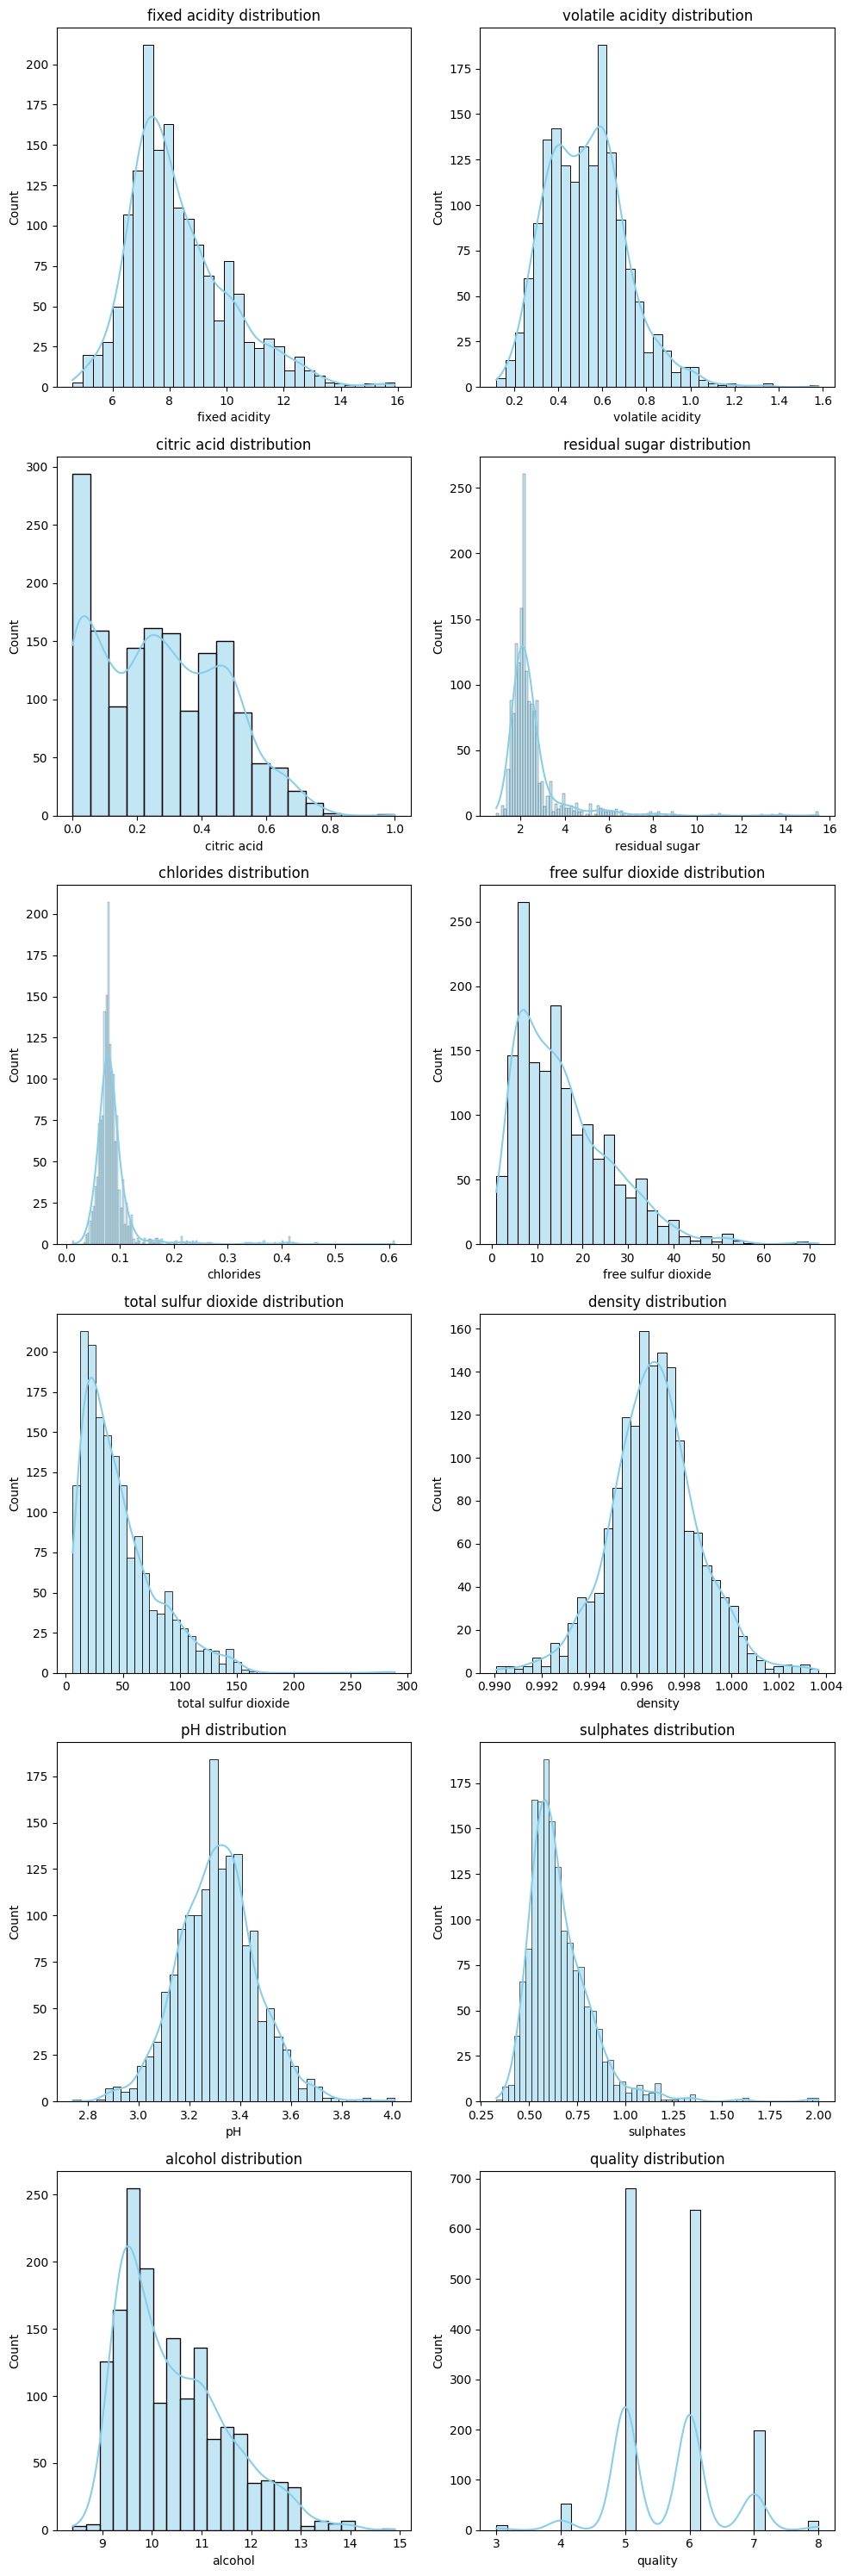

In [ ]:
cols_to_plot = wine.columns
fig, axes = plt.subplots(6, 2, figsize=(10, 30))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
  sns.histplot(data=wine, x=col, ax= axes[i], color='skyblue', kde=True)#, hue='quality', palette = 'viridis', multiple='stack')
  axes[i].set_title(f'{col} distribution')

plt.tight_layout()
plt.show()

In [ ]:
y = wine['quality']
X = wine.drop(columns=['quality'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


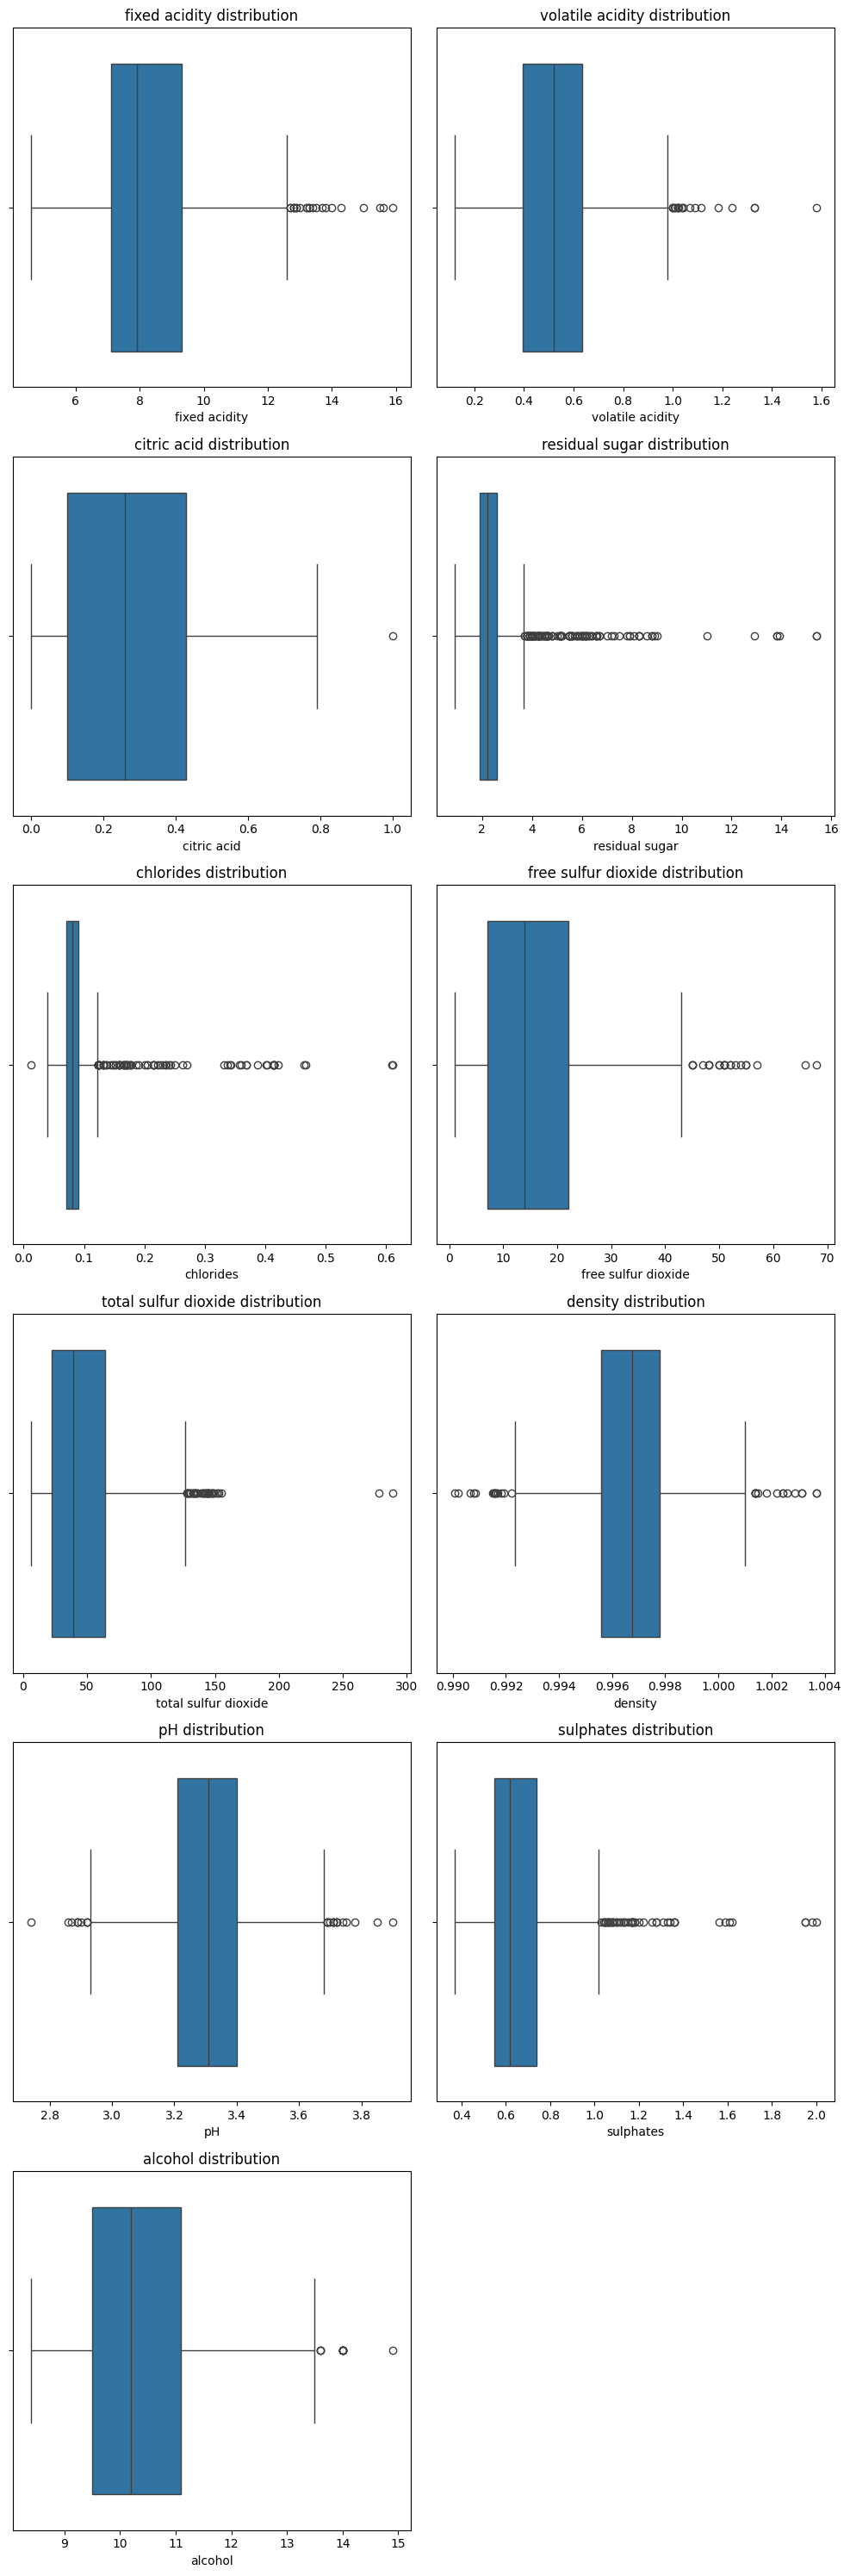

In [ ]:
cols_to_plot = X_train.columns
fig, axes = plt.subplots(6, 2, figsize=(10, 30))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
  sns.boxplot(data=X_train, x=col,ax= axes[i])
  axes[i].set_title(f'{col} distribution')

for j in range(len(cols_to_plot), 12):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
for col in X_train:
  q1 = X_train[col].quantile(0.25)
  q3 = X_train[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  X_train[col] = X_train[col].clip(lower=lower_bound, upper=upper_bound)
  X_test[col] = X_test[col].clip(lower=lower_bound, upper=upper_bound)

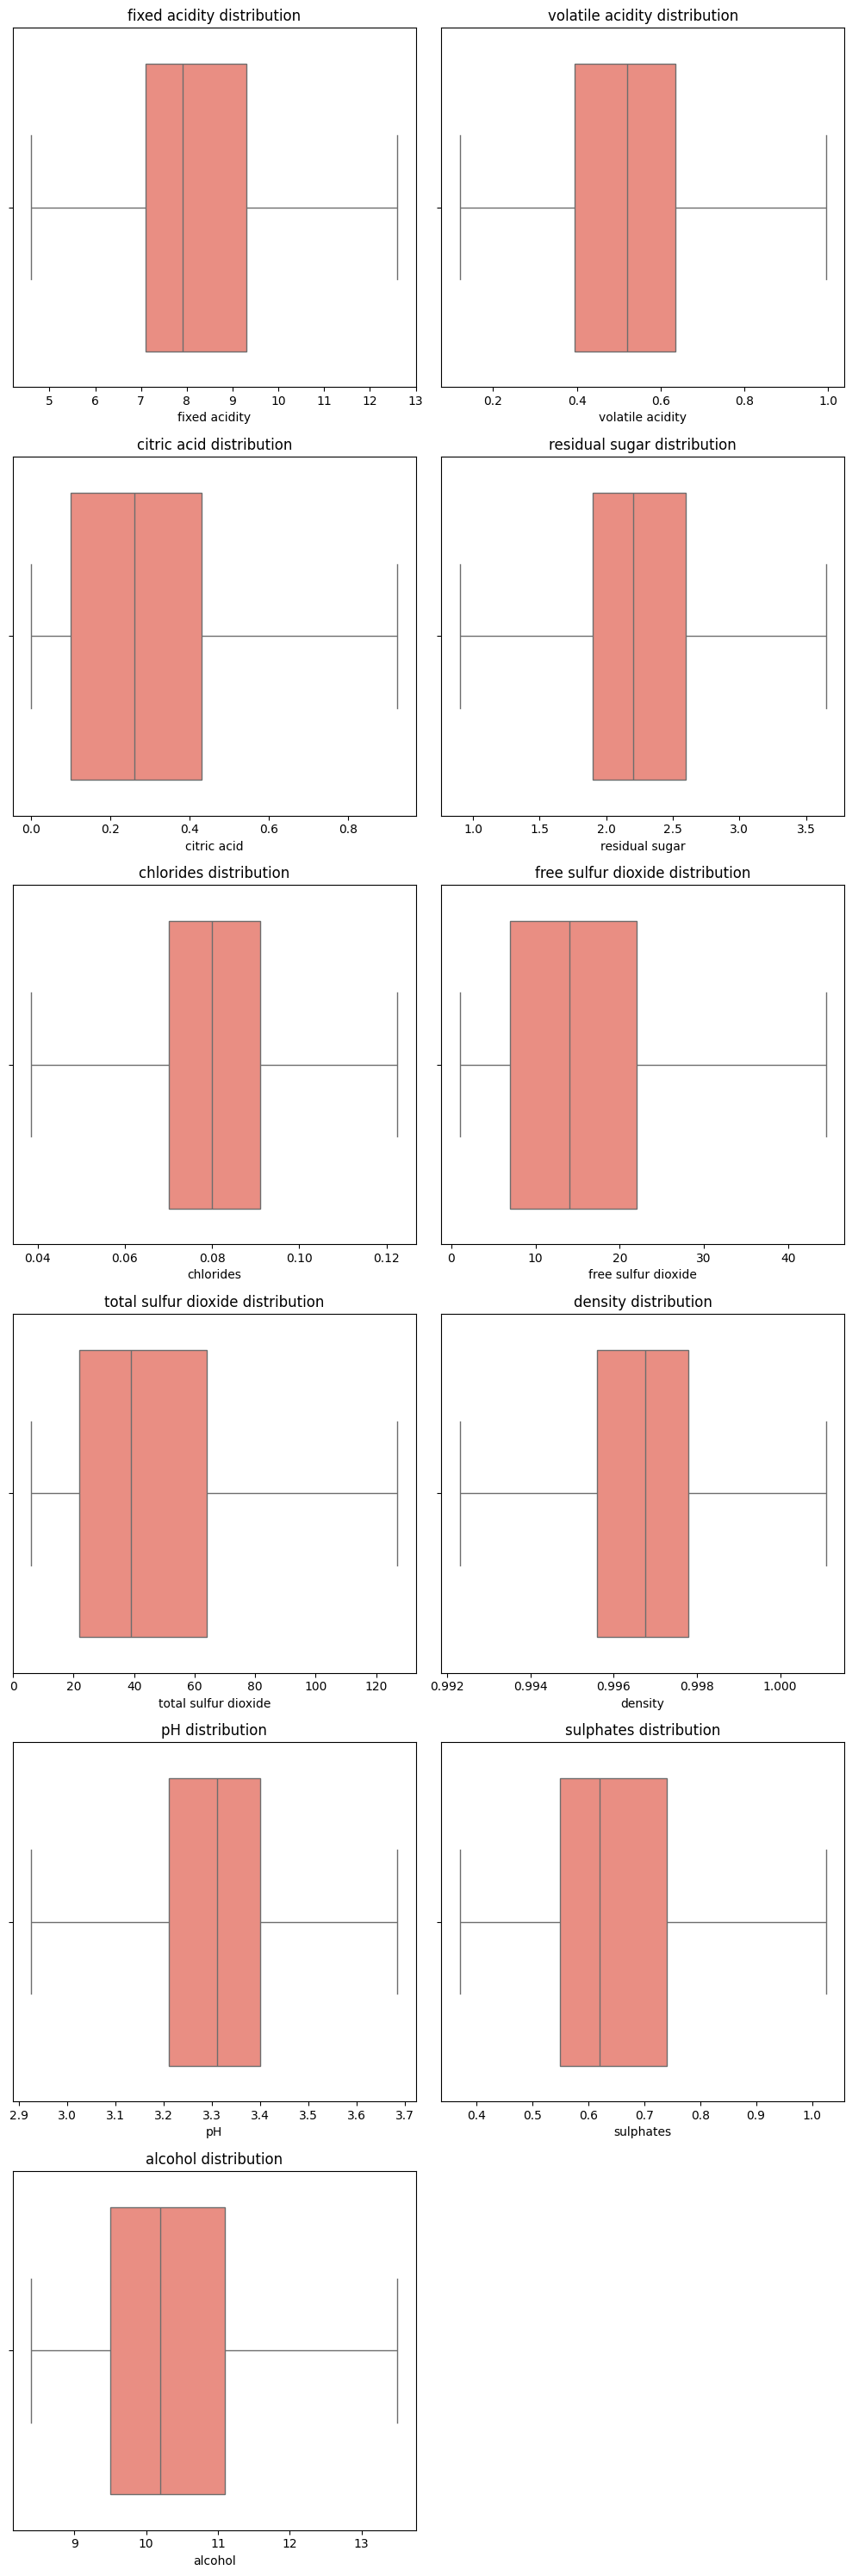

In [ ]:
cols_to_plot = X_train.columns
fig, axes = plt.subplots(6, 2, figsize=(10, 30))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
  sns.boxplot(data=X_train, x=col,ax= axes[i], color='salmon')
  axes[i].set_title(f'{col} distribution')

for j in range(len(cols_to_plot), 12):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
X_train.skew()

,0
fixed acidity,0.706852
volatile acidity,0.433352
citric acid,0.294630
residual sugar,0.886675
chlorides,0.520321
free sulfur dioxide,0.879904
total sulfur dioxide,0.977408
density,0.025985
pH,0.079633
sulphates,0.862465


In [ ]:
skewed = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']
for col in skewed:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std_scaler = StandardScaler()
minmaxscaler = MinMaxScaler()


X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
X_train.skew()

,0
fixed acidity,0.706852
volatile acidity,0.433352
citric acid,0.294630
residual sugar,0.526772
chlorides,0.520321
free sulfur dioxide,-0.162436
total sulfur dioxide,-0.123667
density,0.025985
pH,0.079633
sulphates,0.673583


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=200)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
print('f1 score: ',f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.596875
Precision:  0.5761699794699515
Recall:  0.596875
f1 score:  0.5754804785883483


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3, 50)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  metric_k.append(acc)

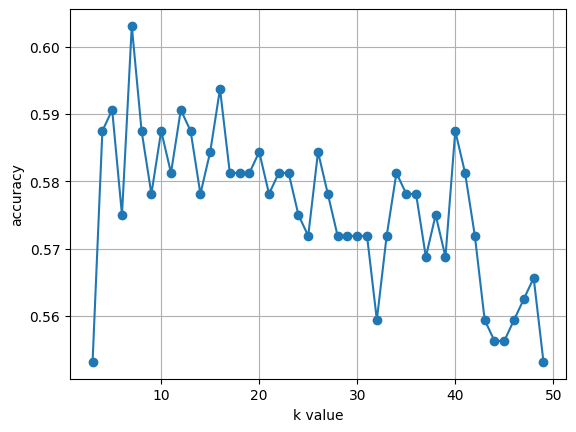

In [ ]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
print('f1 score: ',f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.603125
Precision:  0.5849971899996727
Recall:  0.603125
f1 score:  0.5881294159945896


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
new_data = [
    [7.5, 0.5, 0.3, 2.0, 0.08, 10.0, 40.0, 0.997, 3.4, 0.6, 10.0],
    [8.1, 0.45, 0.4, 2.1, 0.07, 12.0, 35.0, 0.996, 3.3, 0.7, 10.5],
    [6.5, 0.6, 0.1, 1.8, 0.09, 15.0, 50.0, 0.998, 3.5, 0.5, 9.5],
    [9.0, 0.3, 0.5, 2.5, 0.075, 8.0, 30.0, 0.995, 3.2, 0.8, 11.0],
    [7.0, 0.55, 0.2, 1.9, 0.085, 11.0, 45.0, 0.9975, 3.45, 0.65, 10.2],
    [8.5, 0.4, 0.45, 2.2, 0.065, 9.0, 28.0, 0.9965, 3.35, 0.75, 10.8],
    [6.0, 0.7, 0.05, 1.7, 0.1, 20.0, 60.0, 0.999, 3.6, 0.45, 9.0],
    [9.5, 0.25, 0.55, 2.8, 0.06, 7.0, 25.0, 0.9945, 3.1, 0.85, 11.5],
    [7.2, 0.52, 0.25, 2.0, 0.082, 13.0, 42.0, 0.9972, 3.38, 0.62, 10.3],
    [8.8, 0.35, 0.48, 2.3, 0.078, 10.0, 33.0, 0.9955, 3.25, 0.78, 11.3],
    [6.8, 0.65, 0.15, 1.95, 0.095, 18.0, 55.0, 0.9985, 3.55, 0.55, 9.8],
    [9.2, 0.28, 0.52, 2.6, 0.068, 6.0, 20.0, 0.994, 3.05, 0.9, 12.0],
    [7.8, 0.48, 0.35, 2.15, 0.088, 14.0, 48.0, 0.9978, 3.42, 0.68, 10.6],
    [8.0, 0.42, 0.38, 2.05, 0.072, 11.0, 38.0, 0.9968, 3.32, 0.72, 10.9],
    [6.3, 0.68, 0.08, 1.85, 0.098, 22.0, 65.0, 0.9995, 3.65, 0.52, 9.3],
    [9.8, 0.22, 0.58, 3.0, 0.055, 5.0, 18.0, 0.9935, 3.0, 0.95, 12.5],
    [7.6, 0.58, 0.28, 2.0, 0.08, 12.0, 40.0, 0.997, 3.4, 0.6, 10.0],
    [8.3, 0.38, 0.42, 2.2, 0.075, 9.0, 30.0, 0.996, 3.3, 0.7, 10.5],
    [6.6, 0.62, 0.12, 1.9, 0.09, 16.0, 52.0, 0.998, 3.5, 0.55, 9.6],
    [9.1, 0.32, 0.49, 2.4, 0.07, 8.0, 32.0, 0.995, 3.2, 0.8, 11.1]
]


new_data_df = pd.DataFrame(new_data, columns=X.columns)


for col in skewed:
    new_data_df[col] = np.log1p(new_data_df[col])

new_data_scaled = std_scaler.transform(new_data_df)

new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=X.columns)

predicted_quality = logreg_model.predict(new_data_scaled_df)

print("Predicted wine quality for the new data: (Logistic Regression)")
for i, quality in enumerate(predicted_quality):
    print(f"Row {i+1}: {quality}")

predicted_quality = classifier.predict(new_data_scaled_df)

print("Predicted wine quality for the new data: (KNN Classifier)")
for i, quality in enumerate(predicted_quality):
    print(f"Row {i+1}: {quality}")

Predicted wine quality for the new data: (Logistic Regression)
Row 1: 5
Row 2: 6
Row 3: 5
Row 4: 6
Row 5: 5
Row 6: 6
Row 7: 5
Row 8: 7
Row 9: 5
Row 10: 6
Row 11: 5
Row 12: 7
Row 13: 6
Row 14: 6
Row 15: 5
Row 16: 7
Row 17: 5
Row 18: 6
Row 19: 5
Row 20: 6
Predicted wine quality for the new data: (KNN Classifier)
Row 1: 5
Row 2: 6
Row 3: 5
Row 4: 7
Row 5: 5
Row 6: 6
Row 7: 5
Row 8: 7
Row 9: 5
Row 10: 7
Row 11: 5
Row 12: 7
Row 13: 6
Row 14: 6
Row 15: 5
Row 16: 7
Row 17: 5
Row 18: 6
Row 19: 5
Row 20: 7
